In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('train_data.csv')
df2 = pd.read_csv('test_data.csv')

print(df.shape)
print(df2.shape)

(42000, 785)
(28000, 784)


In [3]:
x = df.drop('label',axis=1)
y = df.label

print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
x = x.reshape((42000,28,28,1))
x.shape

(42000, 28, 28, 1)

In [6]:
x1 = np.array(df2)
x1 = scaler.fit_transform(x1)
x1 = x1.reshape((28000,28,28,1))
x1.shape

(28000, 28, 28, 1)

In [7]:
y = np.array(y)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
y= y.reshape((-1,1))
y = enc.fit_transform(y)

y.shape

C:\Users\HollarWealth\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(42000, 10)

In [8]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 28, 28, 1)
(33600, 10)
(8400, 28, 28, 1)
(8400, 10)


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [25]:
model = keras.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

C:\Users\HollarWealth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
from tensorflow import keras

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)
]

In [12]:
!pip install compile


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for compile: filename=compile-1.0.3-py3-none-any.whl size=6531 sha256=d7b3ff9090256b868824ab8f7727d06110b7743ecbcb83416ad4c9e1793dd7fe
  Stored in directory: c:\users\hollarwealth\appdata\local\pip\cache\wheels\22\cf\f6\1aa59e70cf1155809e03de9eb86178f61e00e20ef0424e0aa1
Successfully built compile


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 108s 159ms/step - accuracy: 0.7587 - loss: 0.7012 - val_accuracy: 0.9852 - val_loss: 0.0475
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 114s 174ms/step - accuracy: 0.9724 - loss: 0.1024 - val_accuracy: 0.9908 - val_loss: 0.0291
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 114s 173ms/step - accuracy: 0.9810 - loss: 0.0722 - val_accuracy: 0.9889 - val_loss: 0.0374
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 113s 172ms/step - accuracy: 0.9823 - loss: 0.0643 - val_accuracy: 0.9938 - val_loss: 0.0194
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 122s 186ms/step - accuracy: 0.9841 - loss: 0.0530 - val_accuracy: 0.9945 - val_loss: 0.0159
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 112s 171ms/step - accuracy: 0.9872 - loss: 0.0495 - val_accuracy: 0.9940 - val_loss: 0.0181
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 109s 166ms/step - accuracy: 0.9898 - loss: 0.0387 - val_accuracy: 0.9949 - val_loss: 0.0165
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 104s 158ms/step - accuracy: 0.9892 -

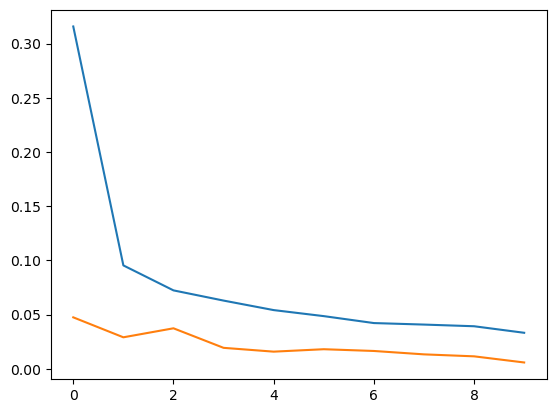

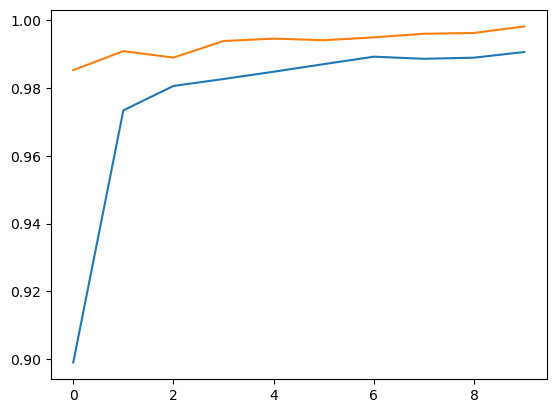

In [27]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])

history = model.fit(x,y,batch_size=64,epochs=10,validation_data=(x_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [28]:
#predicting
predictions=model.predict(x1)
pre=predictions.argmax(axis=-1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step


In [31]:
submission = pd.Series(pre,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.to_csv("final_submission_v1.csv",index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [30]:
prediction=model.predict(x)
pred=prediction.argmax(axis=-1)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step


In [33]:
pred

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)